In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EI, A_v, B_v, x = sym.symbols('EI, A_v, B_v, x')
C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
L = 10
F = 35
EI2, EI3 = sym.symbols('EI2, EI3')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [3]:
q = A_v * sym.SingularityFunction(x,0,-1) + F * sym.SingularityFunction(x,L/3,-1) + B_v * sym.SingularityFunction(x,L,-1)
display(q)
V = -sym.integrate(q, x) + C_1
display(V)
M = sym.integrate(V, x) + C_2
display(M)
kappa = M/EI + ((1-EI/EI2)/EI)*sym.SingularityFunction(x,L/3,0)*(A_v*L/3)  + ((1-EI/EI2)/EI)*sym.SingularityFunction(x,L/3,1)*(A_v+F) + ((1-EI2/EI3)/EI2)*sym.SingularityFunction(x,2*L/3,0)*(A_v*2*L/3+F*L/3)  + ((1-EI2/EI3)/EI2)*sym.SingularityFunction(x,2*L/3,1)*(A_v+F)
phi = sym.integrate(kappa, x) + C_3
display(phi)
w = -sym.integrate(phi, x) + C_4
display(w)
print(sym.latex(sym.Eq(ql,q)))
print(sym.latex(sym.Eq(Vl,V)))
print(sym.latex(sym.Eq(Ml,M)))
print(sym.latex(sym.Eq(kappal,kappa)))
print(sym.latex(sym.Eq(phil,phi)))
print(sym.latex(sym.Eq(wl,w)))

A_v*SingularityFunction(x, 0, -1) + B_v*SingularityFunction(x, 10, -1) + 35*SingularityFunction(x, 3.33333333333333, -1)

-A_v*SingularityFunction(x, 0, 0) - B_v*SingularityFunction(x, 10, 0) + C_1 - 35*SingularityFunction(x, 3.33333333333333, 0)

-A_v*SingularityFunction(x, 0, 1) - B_v*SingularityFunction(x, 10, 1) + C_1*x + C_2 - 35*SingularityFunction(x, 3.33333333333333, 1)

10*A_v*(-EI/EI2 + 1)*SingularityFunction(x, 3.33333333333333, 1)/(3*EI) + C_3 + (A_v + 35)*(-EI2/EI3 + 1)*SingularityFunction(x, 6.66666666666667, 2)/(2*EI2) + (20*A_v/3 + 116.666666666667)*(-EI2/EI3 + 1)*SingularityFunction(x, 6.66666666666667, 1)/EI2 + (A_v + 35)*(-EI/EI2 + 1)*SingularityFunction(x, 3.33333333333333, 2)/(2*EI) + (-A_v*SingularityFunction(x, 0, 2)/2 - B_v*SingularityFunction(x, 10, 2)/2 + C_1*x**2/2 + C_2*x - 35*SingularityFunction(x, 3.33333333333333, 2)/2)/EI

-5*A_v*(-EI/EI2 + 1)*SingularityFunction(x, 3.33333333333333, 2)/(3*EI) - C_3*x + C_4 - (A_v + 35)*(-EI2/EI3 + 1)*SingularityFunction(x, 6.66666666666667, 3)/(6*EI2) - (20*A_v/3 + 116.666666666667)*(-EI2/EI3 + 1)*SingularityFunction(x, 6.66666666666667, 2)/(2*EI2) - (A_v + 35)*(-EI/EI2 + 1)*SingularityFunction(x, 3.33333333333333, 3)/(6*EI) - (-A_v*SingularityFunction(x, 0, 3)/6 - B_v*SingularityFunction(x, 10, 3)/6 + C_1*x**3/6 + C_2*x**2/2 - 35*SingularityFunction(x, 3.33333333333333, 3)/6)/EI

q_{z} = A_{v} {\left\langle x \right\rangle}^{-1} + B_{v} {\left\langle x - 10 \right\rangle}^{-1} + 35 {\left\langle x - 3.33333333333333 \right\rangle}^{-1}
V = - A_{v} {\left\langle x \right\rangle}^{0} - B_{v} {\left\langle x - 10 \right\rangle}^{0} + C_{1} - 35 {\left\langle x - 3.33333333333333 \right\rangle}^{0}
M = - A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 10 \right\rangle}^{1} + C_{1} x + C_{2} - 35 {\left\langle x - 3.33333333333333 \right\rangle}^{1}
\kappa = \frac{10 A_{v} \left(- \frac{EI}{EI_{2}} + 1\right) {\left\langle x - 3.33333333333333 \right\rangle}^{0}}{3 EI} + \frac{\left(A_{v} + 35\right) \left(- \frac{EI_{2}}{EI_{3}} + 1\right) {\left\langle x - 6.66666666666667 \right\rangle}^{1}}{EI_{2}} + \frac{\left(\frac{20 A_{v}}{3} + 116.666666666667\right) \left(- \frac{EI_{2}}{EI_{3}} + 1\right) {\left\langle x - 6.66666666666667 \right\rangle}^{0}}{EI_{2}} + \frac{\left(A_{v} + 35\right) \left(- \frac{EI}{EI_{2}} + 1\right) {\left\langle x -

In [4]:
eq1 = sym.Eq(M.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,0),0)
eq3 = sym.Eq(M.subs(x,L),0)
eq4 = sym.Eq(w.subs(x,L),0)
eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)
display(eq1, eq2, eq3, eq4, eq5, eq6)
print(sym.latex(eq1))
print(sym.latex(eq3))
print(sym.latex(eq2))
print(sym.latex(eq4))
print(sym.latex(eq5))
print(sym.latex(eq6))

Eq(C_2, 0)

Eq(C_4, 0)

Eq(-10*A_v + 10*C_1 + C_2 - 233.333333333333, 0)

Eq(-74.0740740740741*A_v*(-EI/EI2 + 1)/EI - 10*C_3 + C_4 - 6.17283950617284*(A_v + 35)*(-EI2/EI3 + 1)/EI2 - 5.55555555555555*(20*A_v/3 + 116.666666666667)*(-EI2/EI3 + 1)/EI2 - 49.3827160493827*(A_v + 35)*(-EI/EI2 + 1)/EI - (-500*A_v/3 + 500*C_1/3 + 50*C_2 - 1728.39506172839)/EI, 0)

Eq(C_1, 0)

Eq(-A_v - B_v + C_1 - 35, 0)

C_{2} = 0
- 10 A_{v} + 10 C_{1} + C_{2} - 233.333333333333 = 0
C_{4} = 0
- \frac{74.0740740740741 A_{v} \left(- \frac{EI}{EI_{2}} + 1\right)}{EI} - 10 C_{3} + C_{4} - \frac{6.17283950617284 \left(A_{v} + 35\right) \left(- \frac{EI_{2}}{EI_{3}} + 1\right)}{EI_{2}} - \frac{5.55555555555555 \cdot \left(\frac{20 A_{v}}{3} + 116.666666666667\right) \left(- \frac{EI_{2}}{EI_{3}} + 1\right)}{EI_{2}} - \frac{49.3827160493827 \left(A_{v} + 35\right) \left(- \frac{EI}{EI_{2}} + 1\right)}{EI} - \frac{- \frac{500 A_{v}}{3} + \frac{500 C_{1}}{3} + 50 C_{2} - 1728.39506172839}{EI} = 0
C_{1} = 0
- A_{v} - B_{v} + C_{1} - 35 = 0


In [5]:
sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6),(C_1,C_2,C_3,C_4,A_v,B_v))
display(sol)
display(w.subs(sol).factor(EI))
print(sym.latex(sol))

{C_1: 0.0,
 C_2: 0.0,
 C_3: 0.00411522633744856*(-3500.0*EI*EI2 - 24500.0*EI*EI3 - 24500.0*EI2*EI3)/(EI*EI2*EI3),
 C_4: 0.0,
 A_v: -23.3333333333333,
 B_v: -11.6666666666667}

(EI*(86.4197530864198*EI2*x - 116.666666666667*EI2*SingularityFunction(x, 6.66666666666667, 2) + 11.6666666666667*EI2*SingularityFunction(x, 6.66666666666667, 3) + 604.938271604938*EI3*x - 233.333333333333*EI3*SingularityFunction(x, 3.33333333333333, 2) + 11.6666666666667*EI3*SingularityFunction(x, 3.33333333333333, 3) + 116.666666666667*EI3*SingularityFunction(x, 6.66666666666667, 2) - 11.6666666666667*EI3*SingularityFunction(x, 6.66666666666667, 3)) + 604.938271604938*EI2*EI3*x - 23.3333333333333*EI2*EI3*SingularityFunction(x, 0, 3) + 233.333333333333*EI2*EI3*SingularityFunction(x, 3.33333333333333, 2) + 23.3333333333333*EI2*EI3*SingularityFunction(x, 3.33333333333333, 3) - 11.6666666666667*EI2*EI3*SingularityFunction(x, 10, 3))/(6*EI*EI2*EI3)

\left\{ A_{v} : -23.3333333333333, \  B_{v} : -11.6666666666667, \  C_{1} : 0.0, \  C_{2} : 0.0, \  C_{3} : \frac{0.00411522633744856 \left(- 3500.0 EI EI_{2} - 24500.0 EI EI_{3} - 24500.0 EI_{2} EI_{3}\right)}{EI EI_{2} EI_{3}}, \  C_{4} : 0.0\right\}


In [6]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

0.04906121399176976
0.04047199183043862


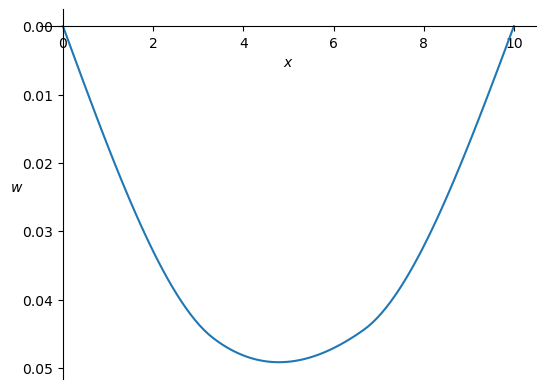

In [7]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
print(w_numpy(5))
print(w_numpy(7.24562))

In [8]:
V_numpy = sym.lambdify(x, V.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

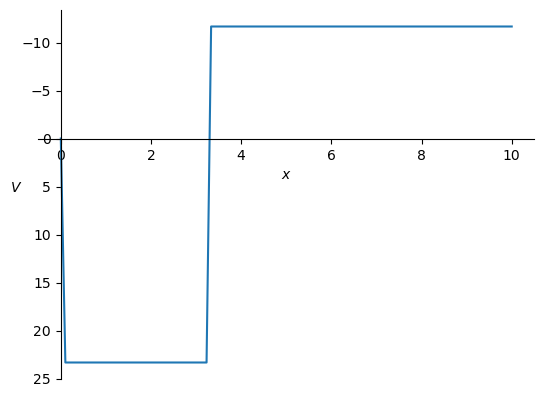

In [9]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [10]:
M_numpy = sym.lambdify(x, M.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

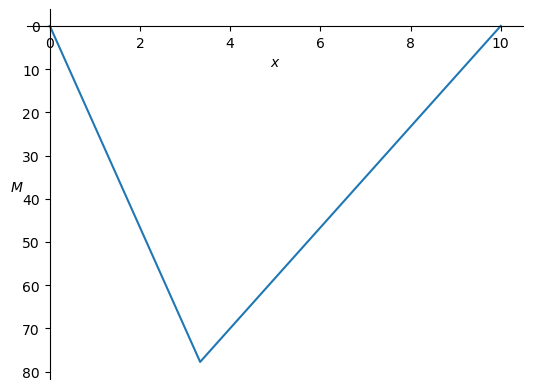

In [11]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [12]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000).rewrite(sym.Piecewise))

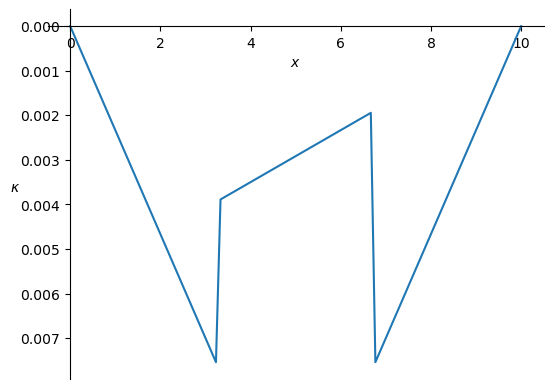

In [13]:
x_numpy = np.linspace(0,L,100)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [14]:
display(w.subs(sol).subs(EI,10000).subs(EI2,20000).subs(EI3,5000))
print(w_numpy(2))
print(kappa_numpy(11+very_small).subs(oo,sym.oo))

0.0180041152263375*x - 0.000388888888888889*SingularityFunction(x, 0, 3) + 0.00194444444444444*SingularityFunction(x, 3.33333333333333, 2) + 0.000486111111111111*SingularityFunction(x, 3.33333333333333, 3) - 0.00291666666666667*SingularityFunction(x, 6.66666666666667, 2) + 0.000291666666666667*SingularityFunction(x, 6.66666666666667, 3) - 0.000194444444444444*SingularityFunction(x, 10, 3)

0.032897119341563884
-0.00116666666666673
